# Simulation 1

In this simulation we evaluate qualitatively the dynamics of convergence of points (*opinions*) to a barycenter (*consensus*) when at each timestep a randomly selected point takes an $\epsilon$-step towards the barycenter in the point phase-space (*space of opinions*).

We start by importing some libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import data
import phasespace as ps

We import a set of 3 points. Notice that the component of these three points expresses a preference (and theoretically, they should sum to $1$, although they do not in this simulation). 

In [2]:
P = data.datapoints1()

We computer the initial barycenter.

In [3]:
pstar = ps.compute_barycenter(P)

We run and plot our simulation. At each iteration, the current barycenter is computed, a point is uniformly at random selected, and a step of $\epsilon=0.5$ towards the barycenter is taken. This loop is repeated until convergence, that is when the $\ell_2$-distance between the points and the barycenter is less than a threshold $\theta=0.01$.

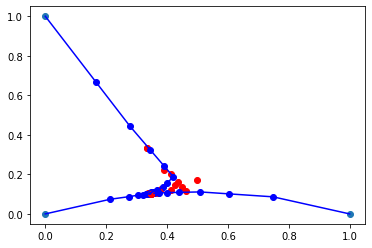

In [4]:
plt.scatter(P[:,0],P[:,1])
plt.scatter(pstar[0],pstar[1],c='red')

while(not(ps.check_convergence(P,pstar,norm='l2',epsilon=0.01))):
    i = ps.sample_point(P.shape[0])
    pprime = ps.take_a_step(P[i,:],pstar,epsilon=0.5)
    
    plt.plot([P[i,0],pprime[0]],[P[i,1],pprime[1]],c='blue')
    plt.scatter(pprime[0],pprime[1],c='blue')
    P[i,:] = pprime
    plt.scatter(pstar[0],pstar[1],c='red')
    
    pstar = ps.compute_barycenter(P)

The blue lines represent the trajectory of each point towards the barycenter, the red dots represent the position of the barycenter moving in time.

For statistical evaluation, we repeat the above simulation $10^5$ times and we collect statistics.

In [5]:
N = 10**5

pstars = []
for _ in tqdm(range(N)):
    P = data.datapoints1()
    pstar = ps.compute_barycenter(P)
    
    while(not(ps.check_convergence(P,pstar,norm='l2',epsilon=0.01))):
        i = ps.sample_point(P.shape[0])
        pprime = ps.take_a_step(P[i,:],pstar,epsilon=0.5)

        P[i,:] = pprime

        pstar = ps.compute_barycenter(P)
        
    pstars.append(pstar)



100%|██████████| 100000/100000 [02:36<00:00, 637.43it/s]


We plot the results.

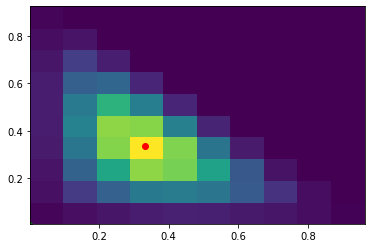

In [6]:
np_pstars = np.array(pstars) 

P = data.datapoints1()
pstar = ps.compute_barycenter(P)

plt.hist2d(np_pstars[:,0],np_pstars[:,1])
plt.scatter(P[:,0],P[:,1],c='green')
plt.scatter(pstar[0],pstar[1],c='red')

The red dot represent the barycenter at time step $0$. The 2D histogram shows the probability density of the final convergent consensus. 